In [22]:
%cd /content/drive/MyDrive/21-1/Computational Physics

/content/drive/MyDrive/21-1/Computational Physics


In [23]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

1. 포물선 운동

In [28]:
df1=pd.read_csv('./data/Data1.dat',header=None)

In [29]:
df1=df1.T
df1.columns=['t','x','y']

In [30]:
df1.head()

,t,x,y
0,0.0000,0.0276,10.0578
1,0.0731,0.2438,11.0479
2,0.1463,0.2914,12.0868
3,0.2194,0.5685,13.0339
4,0.2926,0.8070,13.9024


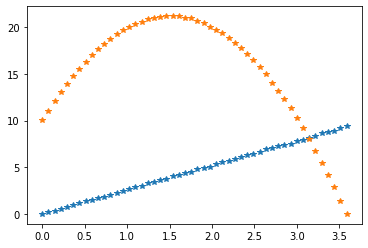

In [38]:
plt.plot(df1.t,df1.x,'*')
plt.plot(df1.t,df1.y,'*')

t,x는 일차 선형관계
t,y는 이차 관계인것으로 판단하고 fitting 한다.

In [45]:
#x=x_0+v*cos(theta)*t
#y=y_0+v*sin(theta)-(g*t^2)/2 를 만족한다
pfit1=np.polyfit(df1.t,df1.x,1)
pfit2=np.polyfit(df1.t,df1.y,2)

In [47]:
#따라서 다음을 만족한다.
print(f'x0:{pfit1[1]:.5f}, v*cos(theta):{pfit1[0]:.5f}')
print(f'y0:{pfit2[2]:.5f}, v*sin(theta):{pfit2[1]:.5f}, -g/2:{pfit2[0]:.5f}')

x0:-0.00120, v*cos(theta):2.60320
y0:10.00921, v*sin(theta):14.78166, -g/2:-4.90338


In [60]:
#tan(theta)=v*sin(theta)/v*cos(theta)
#h=y0
#g=
tan=pfit2[1]/pfit1[0]
rad=np.arctan(tan)
v=pfit2[1]/np.sin(rad)
h=pfit2[2]
g=pfit2[0]*-2
print(f'v:{v:.4f} m/s, tan_theta:{tan:.4f},\nh:{h:.4f} m, g:{g:.4f} m/s^2')

v:15.0091 m/s, tan_theta:5.6783,
h:10.0092 m, g:9.8068 m/s^2


2. 대기오염

In [161]:
df2=pd.read_csv('./data/air_pollution.csv')

In [168]:
#month를 연속형데이터인 코로나 일차인 month_cnt로 새로운 변수생성
df2['month_cnt']=df2.index+1
df2.head()

,month,ozone,dust,month_cnt
0,201601,0.013,52,1
1,201602,0.016,48,2
2,201603,0.026,66,3
3,201604,0.031,76,4
4,201605,0.036,59,5


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


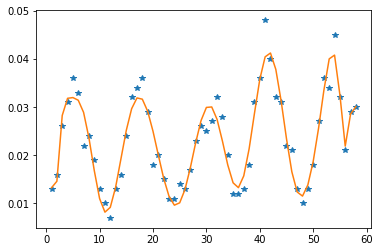

In [173]:
#개월 수와 오존농도 fit
pfit1=np.polyfit(df2.month_cnt,df2.ozone,20)
line=np.poly1d(pfit1)
yy=line(df2.month_cnt)
plt.plot(df2.month_cnt,df2.ozone,'*')
plt.plot(df2.month_cnt,yy)

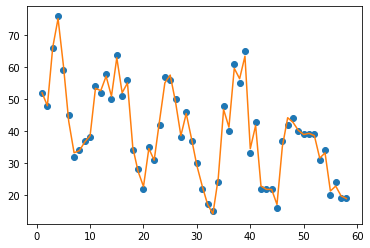

In [193]:
#개울 수와 미세먼지 fit
from scipy.interpolate import UnivariateSpline
#cubic spline fitting
spl = UnivariateSpline(df2.month_cnt, df2.dust)
plt.plot(df2.month_cnt,df2.dust,'o')
plt.plot(df2.month_cnt,spl(df2.month_cnt))
plt.show()

3. 코로나19

In [194]:
df3=pd.read_csv('./data/covid.csv')

In [195]:
#date를 연속형데이터인 코로나 일차인 date_cnt로 새로운 변수생성
df3['date_cnt']=df3.index+1
df3.head()

,date,confirmed,date_cnt
0,20200121,1,1
1,20200122,1,2
2,20200123,1,3
3,20200124,2,4
4,20200125,2,5


In [196]:
#5차함수일때 최적으로 fitting 되는것으로 생각5차함수일때 최적으로 fitting 되는것으로 생각되어 5차함수로 하였다.
pfit3=np.polyfit(df3.date_cnt, df3.confirmed,5)
line=np.poly1d(pfit3)
yy=line(df3.date_cnt)

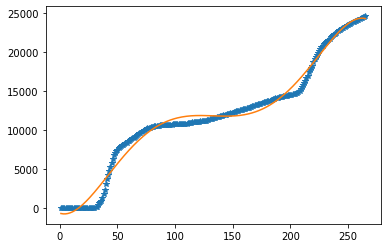

In [197]:
plt.plot(df3.date_cnt, df3.confirmed,'*') #주어진데이터
plt.plot(df3.date_cnt,yy) #fiifing 그래프

4. 감쇠 조화 진동자

In [141]:
df4=pd.read_csv('./data/Data.dat',header=None)

In [143]:
df4=df4.T
df4.columns=['t','x']

In [144]:
df4.head()

,t,x
0,0.0000,0.4768
1,0.0754,0.4531
2,0.1508,0.4521
3,0.2261,0.4238
4,0.3015,0.3679


In [134]:
def f(t,a,b,w,pi):
  m=0.2
  return a*np.exp((-b*t)/(2*m))*np.sin(w*t+pi)

In [147]:
from scipy.optimize import curve_fit
parm,cov_mat=curve_fit(f,df4.t,df4.x)

In [149]:
yy=f(df4.t,*parm)

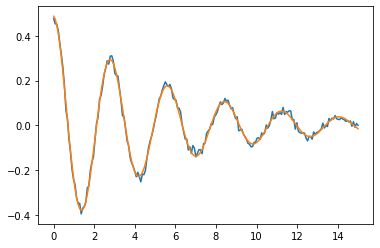

In [151]:
plt.plot(df4.t,df4.x) #원래 데이터
plt.plot(df4.t,yy) #fiiting 그래프

In [155]:
m=0.2
b=parm[1]
w=parm[2]
#w=sqrt(k/m-(b/2m)**2)이므로 k에 대하여 정리하면
k=m*(w*w+(b/(2*m))**2)
print(f'k:{k:.3} N/M, b:{b:.3}')

k:1.0 N/M, b:0.0721
